In [1]:
import pandas as pd
data = pd.read_csv("academicStressLevel.csv")
data.head(5)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [2]:
data.columns = data.columns.str.strip()

data = data.rename(columns={
    "Timestamp": "timeStamp",
    "Your Academic Stage": "schoolYear",
    "Peer pressure": "peerPressure",
    "Academic pressure from your home": "homePressure",
    "Study Environment": "studyEnvironment",
    "What coping strategy you use as a student?": "copingStrategy",
    "Do you have any bad habits like smoking, drinking on a daily basis?": "badHabits",
    "What would you rate the academic  competition in your student life": "academicCompetition",
    "Rate your academic stress index": "stressIndex"  # corrected
})

data.head(5)


,timeStamp,schoolYear,peerPressure,homePressure,studyEnvironment,copingStrategy,badHabits,academicCompetition,stressIndex
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [3]:
factor_columns = [
    "schoolYear",
    "peerPressure",
    "homePressure",
    "studyEnvironment",
    "copingStrategy",
    "badHabits",
    "academicCompetition",
    "stressIndex"
]

for col in factor_columns:
    data[col] = data[col].astype('category')


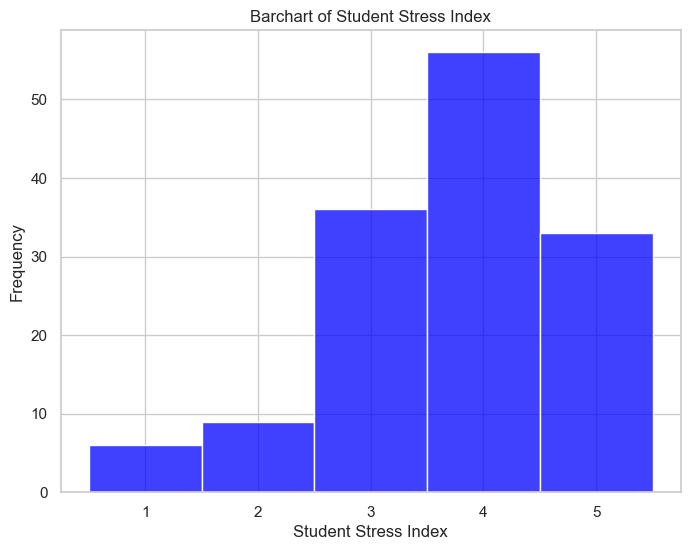

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid") 
plt.figure(figsize=(8,6))

sns.histplot(data["stressIndex"], bins=10, color="blue")  
plt.xlabel("Student Stress Index")
plt.ylabel("Frequency")
plt.title("Barchart of Student Stress Index")
plt.show()

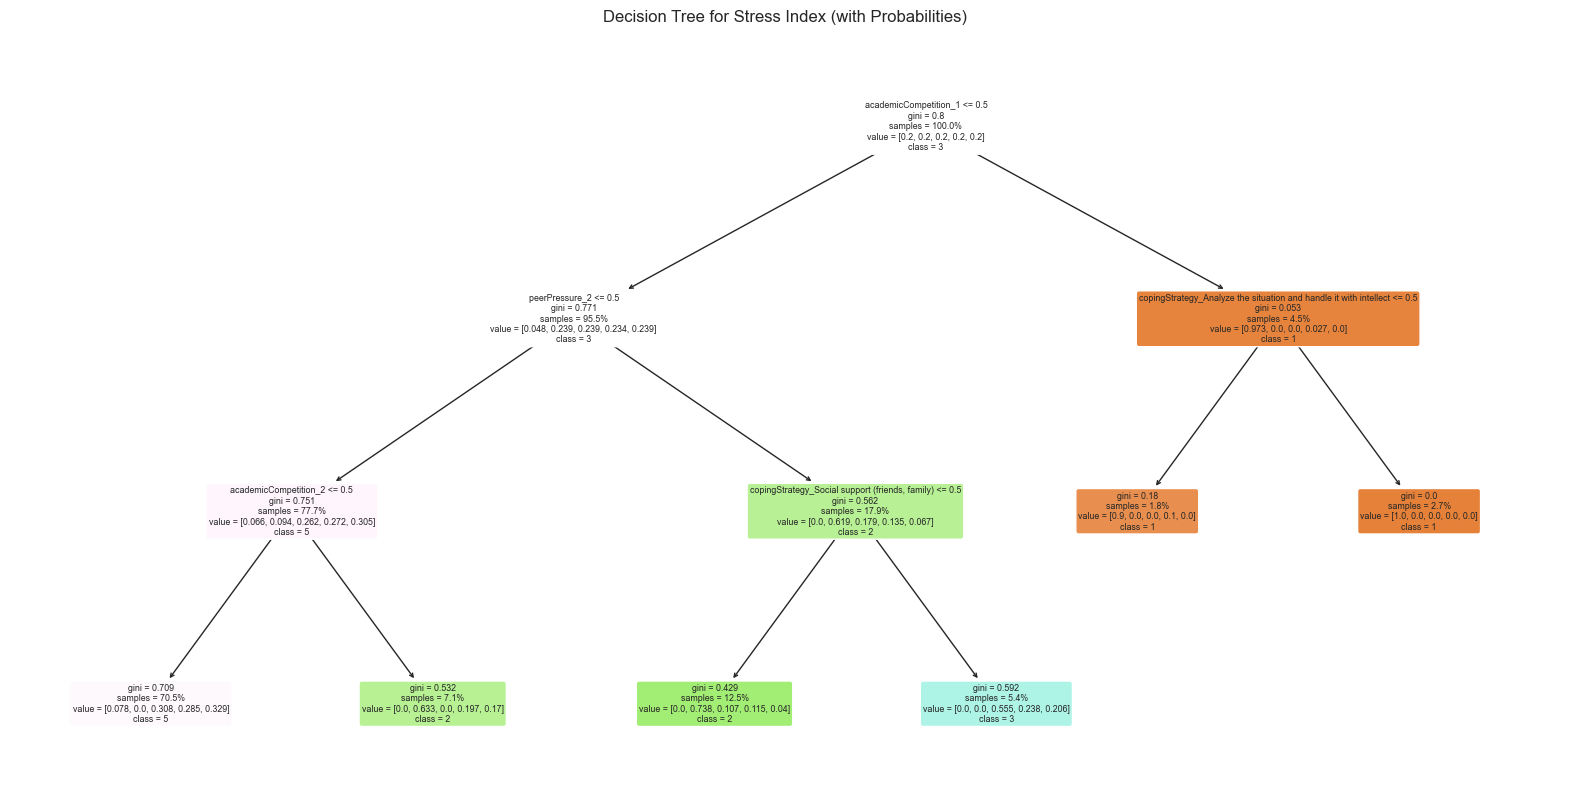

Confusion Matrix:
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 2 0 0 5]
 [0 3 0 0 8]
 [0 1 0 0 6]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.25      1.00      0.40         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        11
           5       0.32      0.86      0.46         7

    accuracy                           0.32        28
   macro avg       0.31      0.57      0.37        28
weighted avg       0.13      0.32      0.18        28



c:\Users\Kille\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kille\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kille\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# Import packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

X = data[["peerPressure", "homePressure", "studyEnvironment", 
          "copingStrategy", "badHabits", "academicCompetition"]]

X = pd.get_dummies(X)

y = data["stressIndex"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,             
    min_samples_leaf=2,       
    class_weight='balanced'   
)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    clf, 
    feature_names=X.columns, 
    class_names=clf.classes_, 
    filled=True, 
    rounded=True,
    proportion=True          
)
plt.title("Decision Tree for Stress Index (with Probabilities)")
plt.show()
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



